<a href="https://colab.research.google.com/github/cm5123/Machine-Learning/blob/master/N431/N431a_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *AIB / SECTION 4 / SPRINT 3 / Assignment 1*
# Convolutional Neural Networks (CNNs)

## Assignment 1

Sobel Filter를 이용해 실제 Convolution(합성곱) 연산이 일어날 때, 이미지가 어떻게 변화하는지 시각화해보겠습니다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 이미지 선정
이미지는 원하시는 아무 이미지를 업로드해서 진행해주세요

In [2]:
from google.colab import files
lena_img = files.upload()

Saving 고양이.jpg to 고양이.jpg


3 채널의 컬러 이미지를 gray scale로 변형하여 사용하겠습니다

In [3]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

Color Img Shape :  (600, 900, 3)
GrayScale Img Shape : (600, 900)


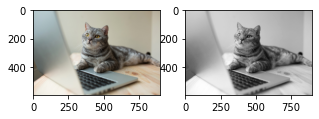

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(5, 10))

img = plt.imread('고양이.jpg')
gray_img = rgb2gray(img)
print("Color Img Shape : ", img.shape)
print("GrayScale Img Shape :", gray_img.shape)
axes[0].imshow(img)
axes[1].imshow(gray_img, 'gray')

수직선과 수평선을 detect하는 Sobel Filter를 이용해 합성곱 연산을 진행하겠습니다

In [6]:
sobel_vertical = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_horizontal = np.array([[1, 2, 1],
                             [0, 0, 0],

                             [-1, -2, -1]])

### 문제 1-1
다음은 Convolution 연산을 진행하는 함수입니다. 각각의 빈칸을 채워주세요
1. 빈칸 A, B : 컨볼루션 연산의 최종 output의 height, width를 구해주세요
2. 빈칸 C, D: val_H, val_W는 filter가 최대한으로 갈 수 있는 index입니다.
3. 빈칸 E : filter와 image 간 convolution 연산을 진행해주세요
  - TIP : filter * img 형태로 원소별 곱셈을 진행하고, numpy에서 제공하는 sum 메소드를 사용할 수 있습니다.

In [10]:
def convolve2D(image, filter, padding=0, strides=1):
  filter_H, filter_W = filter.shape[0], filter.shape[1]
  img_H, img_W = image.shape[0], image.shape[1]

  # Convolution 연산의 출력값인 특성맵 shape
  output_H = int(((img_H - filter_H + 2 * padding) / strides) + 1)
  output_W = int(((img_W - filter_W + 2 * padding) / strides) + 1)
  output = np.zeros((output_H, output_W))

  # Padding 적용하기
  if padding != 0:
    padded_img = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    padded_img[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
  else:
    padded_img = image
  
  ### 변경 ###
  padded_img_H, padded_img_W = padded_img.shape[0], padded_img.shape[1]


  val_H = padded_img_H - (filter_H - 1)
  val_W = padded_img_W - (filter_W - 1)

  for h in range(0, val_H, strides):
    for w in range(0, val_W, strides):
      output[h, w] = (filter * padded_img[h:h+filter_H, w:w+filter_W]).sum()

  return output

Text(0.5, 1.0, 'Horizontal Sobel Filter')

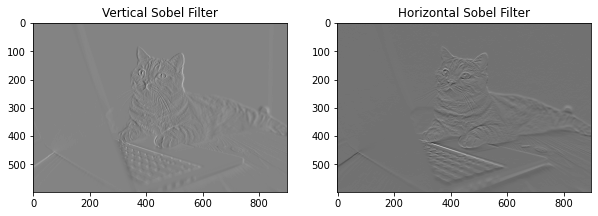

In [11]:
vertical_output = convolve2D(gray_img, sobel_vertical)
horizontal_output = convolve2D(gray_img, sobel_horizontal)

fig, axes = plt.subplots(1, 2, figsize=(10, 20))

axes[0].imshow(vertical_output, 'gray')
axes[0].set_title('Vertical Sobel Filter')
axes[1].imshow(horizontal_output, 'gray')
axes[1].set_title('Horizontal Sobel Filter')

### 문제 1-2
빈칸 A에서 max pooling을 진행해주세요
  - TIP : numpy에서는 max 값을 구해주는 np.max가 존재합니다

In [17]:
def maxPooling2D(image, pool_size=2, strides=2):
  img_H, img_W = image.shape[0], image.shape[1]
  valid_H, valid_W = img_H - (pool_size - 1), img_W - (pool_size - 1)
  
  pooled = []
  for h in range(0, valid_H, strides):
    pooled_ = []
    for w in range(0, valid_W, strides):
      pooled_.append(np.max(image[h:h+pool_size, w:w+pool_size]))
    pooled.append(pooled_)

  return pooled

Text(0.5, 1.0, 'Horizontal Sobel Filter After MaxPooling')

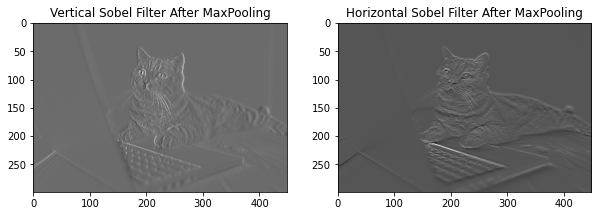

In [18]:
vertical_maxpool_output = maxPooling2D(vertical_output)
horizontal_maxpool_output = maxPooling2D(horizontal_output)

fig, axes = plt.subplots(1, 2, figsize=(10, 20))

axes[0].imshow(vertical_maxpool_output, 'gray')
axes[0].set_title('Vertical Sobel Filter After MaxPooling')
axes[1].imshow(horizontal_maxpool_output, 'gray')
axes[1].set_title('Horizontal Sobel Filter After MaxPooling')

## Assignment 2

케라스를 이용한 바이너리 이미지 분류 모델에 3가지 CNN 모델을 적용하여 보는 과제입니다. <br/>

- [데이터 다운로드](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/mountainForest.zip)

산의 이미지(./data/mountin/*)와 숲의 이미지(./data/forest/*)를 분류하는 문제입니다. <br/>
산을 Positive (1)로, 숲 이미지를 Negative(0)로 레이블링 하여줍니다.

클래스당 약 350개의 이미지로 이루어져 있는데요.<br/>
표본이 작다는 점을 감안하면 현실적으로 어려운 문제입니다.

하지만 이번 과제에서는 해당 데이터에 여러 가지 모델을 적용해보는는 것에 중점을 두어 봅시다. <br/>
과제를 통해 이미지 분류에 적용할 수 있는 여러 모델을 알아보고 서로를 비교하는 데 익숙해져 보면 좋겠죠?

# Code

## Part 1 : Pre-trained Model



Keras에서 제공하는 pre-trained 모델인 ResNet50을 불러와서 사용해봅니다. [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1)은 50 개의 layer를 가진  CNN기반의 모델입니다. <br/>
이미지를 [1000 개의 클래스로](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt)를 분류하는 모델인데요. 우리가 풀어야 할 과제는 2가지 이므로 마지막 출력단을 변경해서 사용해 볼 수 있습니다.


`ResNet50`을 불러올 때, **`include_top=False`** 로 하면, 기존 1000가지 클래스로의 분류 문제를 풀 수 있는 ResNet 모델에서 Fully Connected layer 부분을 제거해주는 역할을 합니다.

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D()
from tensorflow.keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False)
```

아래 부분은 ResNet50 레이어들의 파라미터를 학습하지 않도록 설정합니다. <br/>
이렇게 설정된 매개 변수는 역전파를 통해 오차 정보가 전파 되더라도 파라미터가 업데이트 되지 않습니다.

```python
for layer in resnet.layers:
    layer.trainable = False
```

모델에 추가로 **`Fully-conneted layer(Dense)`** 를 추가해야 합니다. <br/>
사전 학습 모델을 불러오면서 최상위 레이어인 **`Fully-conneted layer`** 를 제거했기 때문이지요.

새로 추가하는 **`Fully-conneted layer`** 에서는 목적인 이진 분류에 맞게 출력층을 설계하여 주어야 합니다. <br/> **`GlobalAveragePooling2D`** 레이어는 마지막 컨벌루션 레이어 출력(2 차원) 각각의 평균을 취해주어 **`Dense`** 층에 들어갈 수 있도록 해줍니다.

```python
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # 출력층을 설계합니다.
model = Model(resnet.input, predictions)
```

### Load in Data

[Keras ImageDataGenerator](https://keras.io/api/preprocessing/image/) 를 참고하여 데이터를 불러옵니다. <br/>
위 링크뿐만 아니라 구글링을 통해 ImageDataGenerator 라이브러리에 대한 여러 예제를 조사하고 참고해보세요. 

Notebook을 여러분의 Google Drive에 Mount 한 후에 이미지를 불러오도록 합니다.

In [4]:
import numpy as np
import tensorflow as tf

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:

import keras
from keras.preprocessing.image_dataset import image_dataset_from_directory

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/file/mountainForest/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 533 files belonging to 2 classes.
Using 427 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/file/mountainForest/validation',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 195 files belonging to 2 classes.
Using 39 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['forest', 'mountain']


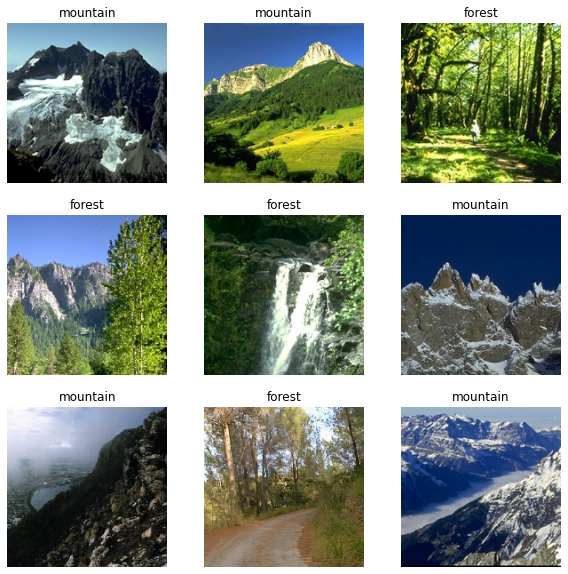

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99782515


### Instatiate Model

In [14]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [15]:
for layer in resnet.layers:
    layer.trainable = False

In [16]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # 출력층을 설계합니다.
model = Model(resnet.input, predictions)

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


### Fit Model

In [23]:
model.fit(train_ds, batch_size=64, epochs=3)

Epoch 1/3
14/14 [==============================] - 52s 3s/step - loss: 0.2245 - accuracy: 0.9438
Epoch 2/3
14/14 [==============================] - 43s 3s/step - loss: 0.0582 - accuracy: 0.9859
Epoch 3/3
14/14 [==============================] - 43s 3s/step - loss: 0.0174 - accuracy: 0.9906


## Part 2 : Custom CNN Model




이 단계에서는 Keras를 사용하여 자신 만의 CNN을 작성하고 훈련합니다. <br/>
네트워크에 적어도 하나의 Conv 레이어와 pooling 레이어가있는 아키텍처를 만들어 사용해 보세요. <br/> 아래는 여러분이 참고할 수 있도록 표시한 결과이며 여러분의 마음대로 설계하여도 됩니다.

### Make a Custom Model

In [24]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compile Model

In [25]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


### Fit Model




In [26]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
14/14 [==============================] - 28s 2s/step - loss: 0.6437 - accuracy: 0.6557 - val_loss: 0.2230 - val_accuracy: 0.9231
Epoch 2/3
14/14 [==============================] - 17s 1s/step - loss: 0.2905 - accuracy: 0.8806 - val_loss: 0.2269 - val_accuracy: 0.9231
Epoch 3/3
14/14 [==============================] - 16s 1s/step - loss: 0.1957 - accuracy: 0.9251 - val_loss: 0.1930 - val_accuracy: 0.8974
